In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import csv
import pandas as pd

Load in all the models to compare

In [4]:
cce_1000_predictions = xr.open_dataset("ml_model_data/cce_1000_1en4/predictions.nc")
cce_1000_history = pd.read_csv("ml_model_data/cce_1000_1en4/history.csv", index_col=0, header=None).T.to_xarray()
cce_2000_predictions = xr.open_dataset("ml_model_data/final_2000/predictions.nc")
cce_2000_history = pd.read_csv("ml_model_data/final_2000/history.csv", index_col=0, header=None).T.to_xarray()
cce_3000_predictions = xr.open_dataset("ml_model_data/final/predictions.nc")
cce_3000_history = pd.read_csv("ml_model_data/final/history.csv", index_col=0, header=None).T.to_xarray()
metadata = pd.read_csv("ml_model_data/cce_1000_1en5/metadata_predict.csv", index_col=0, header=None).T.to_xarray()

FileNotFoundError: [Errno 2] No such file or directory: b'C:\\Users\\lkspy\\Documents\\REU_2021\\hail\\visualization_notebooks\\ml_model_data\\cce_1000_1en4\\predictions.nc'

## Loss

In [3]:
plt.plot(cce_1000_history.loss)
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross Entropy")
plt.yscale('log')
plt.xscale('log')
plt.title("CCE $1x10^-4$ Loss During Training")
#plt.savefig("training_loss_1000")
plt.draw()

NameError: name 'cce_1000_history' is not defined

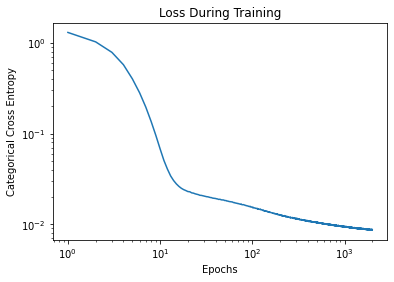

In [338]:
plt.plot(cce_2000_history.loss)
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross Entropy")
plt.yscale('log')
plt.xscale('log')
plt.title("Loss During Training")
plt.savefig("training_loss_2000")
plt.draw()

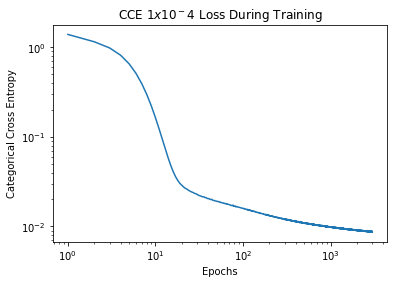

In [337]:
plt.plot(cce_3000_history.loss)
plt.xlabel("Epochs")
plt.ylabel("Categorical Cross Entropy")
plt.yscale('log')
plt.xscale('log')
plt.title("CCE $1x10^-4$ Loss During Training")
plt.savefig("training_loss_3000")
plt.draw()

## Accuracy

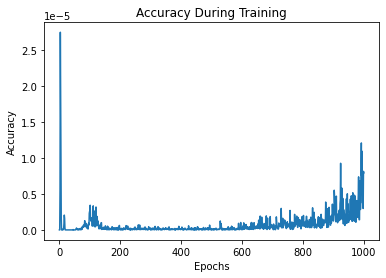

In [339]:
plt.plot(cce_1000_history.accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy During Training")
plt.savefig("training_accuracy_1000")
plt.draw()

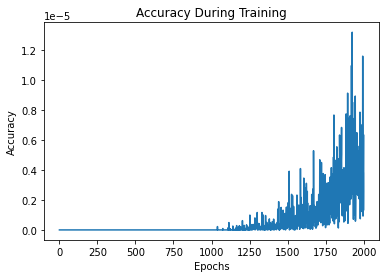

In [340]:
plt.plot(cce_2000_history.accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy During Training")
plt.savefig("training_accuracy_2000")
plt.draw()

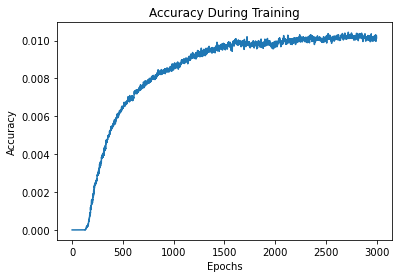

In [341]:
plt.plot(cce_3000_history.accuracy)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy During Training")
plt.savefig("training_accuracy_3000")
plt.draw()

## ROC Curve

In [33]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.calibration import calibration_curve

In [34]:
def plot_roc_curve(predictions, tosave):
    
    # predict probabilities
    nh_probs = predictions.predicted_no_hail[:,:,:].values.ravel()
    h_probs = predictions.predicted_hail[:,:,:].values.ravel()
    sh_probs = predictions.predicted_sev_hail[:,:,:].values.ravel()
    ssh_probs = predictions.predicted_sig_sev_hail[:,:,:].values.ravel()
    
    nh_true = predictions.true_no_hail[:,:,:].values.ravel()
    h_true = predictions.true_hail[:,:,:].values.ravel()
    sh_true = predictions.true_sev_hail[:,:,:].values.ravel()
    ssh_true = predictions.true_sig_sev_hail[:,:,:].values.ravel()
    
    # generate a no skill prediction (majority class)
    ns_probs = [0 for _ in range(len(h_true))]
    
    truth = np.stack((nh_true,h_true,sh_true,ssh_true))
    predict = np.stack((nh_probs,h_probs,sh_probs,ssh_probs))
    noskill = np.stack((np.array(ns_probs),np.array(ns_probs),np.array(ns_probs),np.array(ns_probs)))
    
    ns_auc = roc_auc_score(h_true, ns_probs)
    nh_auc = roc_auc_score(nh_true, nh_probs)
    h_auc = roc_auc_score(h_true, h_probs)
    sh_auc = roc_auc_score(sh_true, sh_probs)
    ssh_auc = roc_auc_score(ssh_true, ssh_probs)
    
    ns_fpr, ns_tpr, ns_thresholds = roc_curve(h_true, ns_probs)
    nh_fpr, nh_tpr, nh_thresholds = roc_curve(nh_true, nh_probs)
    h_fpr, h_tpr, h_thresholds = roc_curve(h_true, h_probs)
    sh_fpr, sh_tpr, sh_thresholds = roc_curve(sh_true, sh_probs)
    ssh_fpr, ssh_tpr, ssh_thresholds = roc_curve(ssh_true, ssh_probs)
    
    #ssh_thresholdshe roc curve for the model
    plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill: AUC=%.3f' % (ns_auc))
    #plt.plot(nh_fpr, nh_tpr, linestyle='-', label='No Hail Unet: AUC=%.3f' % (nh_auc))
    plt.plot(h_fpr, h_tpr, linestyle='-', label='Hail Unet: AUC=%.3f' % (h_auc))
    plt.plot(sh_fpr, sh_tpr, linestyle='-', label='Sev Hail Unet: AUC=%.3f' % (sh_auc))
    plt.plot(ssh_fpr, ssh_tpr, linestyle='-', label='Sig Sev Hail Unet: AUC=%.3f' % (ssh_auc))
    # axis labels
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    # show the legend
    plt.legend()
    plt.tight_layout()
    plt.savefig(tosave)
    # show the plot
    plt.show()

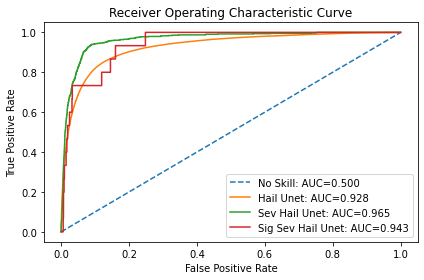

In [35]:
plot_roc_curve(cce_1000_predictions, 'roc_curve_1000ep.png')

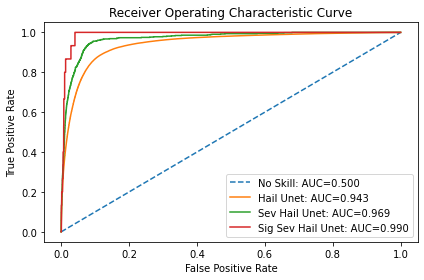

In [36]:
plot_roc_curve(cce_2000_predictions, 'roc_curve_2000ep.png')

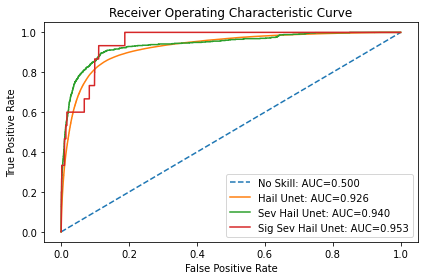

In [37]:
plot_roc_curve(cce_3000_predictions, 'roc_curve_3000ep.png')

## Reliability Diagram

In [38]:
def plot_reliability_diagram(predictions, tosave):
    
    nh_probs = predictions.predicted_no_hail[:,:,:].values.ravel()
    h_probs = predictions.predicted_hail[:,:,:].values.ravel()
    sh_probs = predictions.predicted_sev_hail[:,:,:].values.ravel()
    ssh_probs = predictions.predicted_sig_sev_hail[:,:,:].values.ravel()
    
    nh_true = predictions.true_no_hail[:,:,:].values.ravel()
    h_true = predictions.true_hail[:,:,:].values.ravel()
    sh_true = predictions.true_sev_hail[:,:,:].values.ravel()
    ssh_true = predictions.true_sig_sev_hail[:,:,:].values.ravel()    
    
    prob_true_nh, prob_pred_nh = calibration_curve(nh_true, nh_probs, n_bins=100)
    prob_true_h, prob_pred_h = calibration_curve(h_true, h_probs, n_bins=100)
    prob_true_sh, prob_pred_sh = calibration_curve(sh_true, sh_probs, n_bins=100)
    prob_true_ssh, prob_pred_ssh = calibration_curve(ssh_true, ssh_probs, n_bins=100)
    
    plt.plot([0,1], linestyle='--')
    plt.plot(prob_pred_h,prob_true_h, linestyle='-', label='Hail')
    plt.plot(prob_pred_sh,prob_true_sh, linestyle='-', label='Severe Hail')
    plt.plot(prob_pred_ssh,prob_true_ssh, linestyle='-', label='Significant Severe Hail')
    plt.ylabel("Observed Frequency")
    plt.xlabel("Predicted Probability")
    plt.title("Reliability Diagram")
    plt.legend(loc="best")
    plt.tight_layout()
    plt.savefig(tosave)

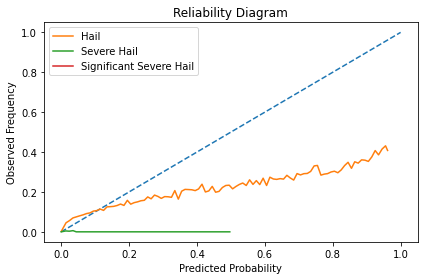

In [39]:
plot_reliability_diagram(cce_1000_predictions, "reliability_diagram_1000.png")

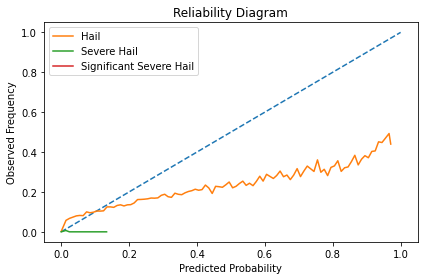

In [42]:
plot_reliability_diagram(cce_2000_predictions, "reliability_diagram_2000.png")

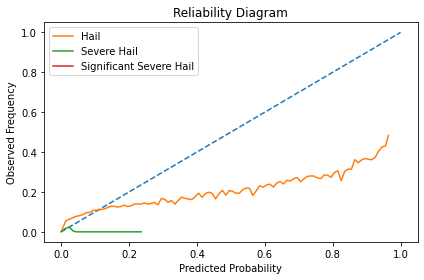

In [41]:
plot_reliability_diagram(cce_3000_predictions, "reliability_diagram_3000.png")

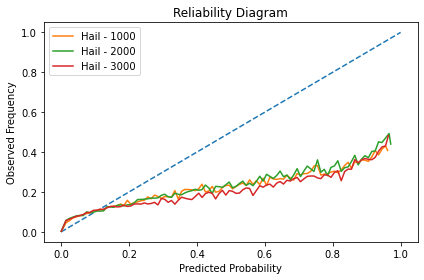

In [45]:
#test
predictions = cce_1000_predictions
predictions1 = cce_2000_predictions
predictions2 = cce_3000_predictions

nh_probs = predictions.predicted_no_hail[:,:,:].values.ravel()
h_probs = predictions.predicted_hail[:,:,:].values.ravel()
sh_probs = predictions.predicted_sev_hail[:,:,:].values.ravel()
ssh_probs = predictions.predicted_sig_sev_hail[:,:,:].values.ravel()

nh_true = predictions.true_no_hail[:,:,:].values.ravel()
h_true = predictions.true_hail[:,:,:].values.ravel()
sh_true = predictions.true_sev_hail[:,:,:].values.ravel()
ssh_true = predictions.true_sig_sev_hail[:,:,:].values.ravel()    

prob_true_nh, prob_pred_nh = calibration_curve(nh_true, nh_probs, n_bins=100)
prob_true_h, prob_pred_h = calibration_curve(h_true, h_probs, n_bins=100)
prob_true_sh, prob_pred_sh = calibration_curve(sh_true, sh_probs, n_bins=100)
prob_true_ssh, prob_pred_ssh = calibration_curve(ssh_true, ssh_probs, n_bins=100)

nh_probs1 = predictions1.predicted_no_hail[:,:,:].values.ravel()
h_probs1 = predictions1.predicted_hail[:,:,:].values.ravel()
sh_probs1 = predictions1.predicted_sev_hail[:,:,:].values.ravel()
ssh_probs1 = predictions1.predicted_sig_sev_hail[:,:,:].values.ravel()

nh_true1 = predictions1.true_no_hail[:,:,:].values.ravel()
h_true1 = predictions1.true_hail[:,:,:].values.ravel()
sh_true1 = predictions1.true_sev_hail[:,:,:].values.ravel()
ssh_true1 = predictions1.true_sig_sev_hail[:,:,:].values.ravel()    

prob_true_nh1, prob_pred_nh1 = calibration_curve(nh_true1, nh_probs1, n_bins=100)
prob_true_h1, prob_pred_h1 = calibration_curve(h_true1, h_probs1, n_bins=100)
prob_true_sh1, prob_pred_sh1 = calibration_curve(sh_true1, sh_probs1, n_bins=100)
prob_true_ssh1, prob_pred_ssh1 = calibration_curve(ssh_true1, ssh_probs1, n_bins=100)

nh_probs2 = predictions2.predicted_no_hail[:,:,:].values.ravel()
h_probs2 = predictions2.predicted_hail[:,:,:].values.ravel()
sh_probs2 = predictions2.predicted_sev_hail[:,:,:].values.ravel()
ssh_probs2 = predictions2.predicted_sig_sev_hail[:,:,:].values.ravel()

nh_true2 = predictions2.true_no_hail[:,:,:].values.ravel()
h_true2 = predictions2.true_hail[:,:,:].values.ravel()
sh_true2 = predictions2.true_sev_hail[:,:,:].values.ravel()
ssh_true2 = predictions2.true_sig_sev_hail[:,:,:].values.ravel()    

prob_true_nh2, prob_pred_nh2 = calibration_curve(nh_true2, nh_probs2, n_bins=100)
prob_true_h2, prob_pred_h2 = calibration_curve(h_true2, h_probs2, n_bins=100)
prob_true_sh2, prob_pred_sh2 = calibration_curve(sh_true2, sh_probs2, n_bins=100)
prob_true_ssh2, prob_pred_ssh2 = calibration_curve(ssh_true2, ssh_probs2, n_bins=100)

plt.plot([0,1], linestyle='--')
plt.plot(prob_pred_h,prob_true_h, linestyle='-', label='Hail - 1000')
#plt.plot(prob_pred_sh,prob_true_sh, linestyle='-', label='Severe Hail - 1000')
#plt.plot(prob_pred_ssh,prob_true_ssh, linestyle='-', label='Significant Severe Hail - 1000')
plt.plot(prob_pred_h1,prob_true_h1, linestyle='-', label='Hail - 2000')
#plt.plot(prob_pred_sh1,prob_true_sh1, linestyle='-', label='Severe Hail - 2000')
#plt.plot(prob_pred_ssh1,prob_true_ssh1, linestyle='-', label='Significant Severe Hail - 2000')
plt.plot(prob_pred_h2,prob_true_h2, linestyle='-', label='Hail - 3000')
#plt.plot(prob_pred_sh2,prob_true_sh2, linestyle='-', label='Severe Hail - 3000')
#plt.plot(prob_pred_ssh2,prob_true_ssh2, linestyle='-', label='Significant Severe Hail - 3000')
plt.ylabel("Observed Frequency")
plt.xlabel("Predicted Probability")
plt.title("Reliability Diagram")
plt.legend(loc="best")
plt.tight_layout()
#plt.savefig(tosave)

## Testing Patches

In [232]:
def plot_ml_output(mesh, output, output1, output2, to_save, idx = 0):
    pkeys = ['predicted_no_hail', 'predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail']
    plabels = ["Predicted No Hail", "Predicted Hail", "Predicted Severe Hail", "Predicted Significant Severe Hail"]

    tkeys = ['true_no_hail', 'true_hail', 'true_sev_hail', 'true_sig_sev_hail']
    tlabels = ["No Hail", "Hail", "Severe Hail", "Significant Severe Hail"]
    
    fig, axes = plt.subplots(4,4,figsize=(12,10))
    axes = axes.ravel()

    for i,ax in enumerate(axes):
        if(i < 4):
            pm = ax.pcolormesh(mesh[tkeys[i]][idx,:,:].T,cmap = 'cividis',vmin = 0,vmax = 1)
            ax.set_title(tlabels[i])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        elif(i < 8):
            pm = ax.pcolormesh(output[pkeys[i - 4]][idx,:,:].T,cmap = 'cividis')#,vmin = 0,vmax = 1)
            ax.set_title(plabels[i - 4])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        elif(i < 12):
            pm = ax.pcolormesh(output1[pkeys[i - 8]][idx,:,:].T,cmap = 'cividis')#,vmin = 0,vmax = 1)
            ax.set_title(plabels[i - 8])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            pm = ax.pcolormesh(output2[pkeys[i - 12]][idx,:,:].T,cmap = 'cividis')#,vmin = 0,vmax = 1)
            ax.set_title(plabels[i - 12])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
    
    plt.tight_layout()
    #plt.savefig(to_save)

In [47]:
mesh1000 = cce_1000_predictions.drop(('predicted_no_hail', 'predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail'))
mesh2000 = cce_2000_predictions.drop(('predicted_no_hail', 'predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail'))
mesh3000 = cce_3000_predictions.drop(('predicted_no_hail', 'predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail'))
output1000 = cce_1000_predictions.drop(('true_no_hail', 'true_hail', 'true_sev_hail', 'true_sig_sev_hail'))
output2000 = cce_2000_predictions.drop(('true_no_hail', 'true_hail', 'true_sev_hail', 'true_sig_sev_hail'))
output3000 = cce_3000_predictions.drop(('true_no_hail', 'true_hail', 'true_sev_hail', 'true_sig_sev_hail'))

In [107]:
predictions_metadata = pd.read_csv("ml_model_data/final/metadata_predict.csv", index_col=0, header=None).T.to_xarray()
predictions_metadata

<xarray.Dataset>
Dimensions:                  (index: 15236)
Coordinates:
  * index                    (index) int64 1 2 3 4 5 ... 15233 15234 15235 15236
Data variables: (12/13)
    Time                     (index) object "['2019-07-07T21:00:00.000000000'...
    Lat                      (index) object '[45.29904382]' ... '[33.66246321]'
    Lon                      (index) object '[266.49257108]' ... '[270.742147...
    MESH Fraction            (index) object '[0.]' '[0.]' ... '[0.]' '[0.]'
    mesh_90_mean             (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_std              (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    ...                       ...
    mesh_90_percentiles_10   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_25   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_50   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_75   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_90   (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'
    mesh_90_percentiles_max  (index) object '[nan]' '[nan]' ... '[nan]' '[nan]'

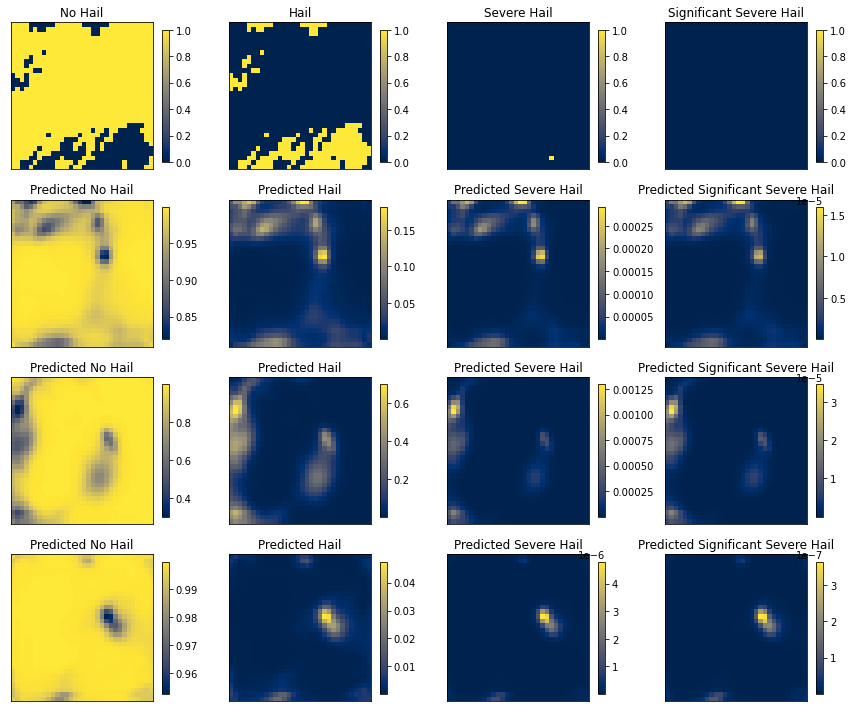

In [95]:
plot_ml_output(mesh1000, output1000, output2000, output3000,'',idx=index2[26])

## Finding the Corresponding HRRR patches

In [108]:
true_hail = mesh1000.true_hail.values
true_sig_sev_hail = mesh1000.true_sig_sev_hail.values
true_sev_hail = mesh1000.true_sev_hail.values
index3 = []
lats3 = []
lons3 = []
times3 = []
index2 = []
lats2 = []
lons2 = []
times2 = []
for i in range(true_hail.shape[0]):
    if(true_sig_sev_hail[i,:,:].max() == 1):
        index3.append(i)
        lats3.append(float(predictions_metadata.Lat.values[i][1:-1]))
        lons3.append(float(predictions_metadata.Lon.values[i][1:-1]))
        times3.append(np.datetime64(predictions_metadata.Time.values[i][2:-15]))
    elif(true_sev_hail[i,:,:].max() == 1):
        index2.append(i)
        lats2.append(float(predictions_metadata.Lat.values[i][1:-1]))
        lons2.append(float(predictions_metadata.Lon.values[i][1:-1]))
        times2.append(np.datetime64(predictions_metadata.Time.values[i][2:-15]))

In [372]:
def plot_patch(patch):
    patch = patch.drop(('totalprecip', 'ltng', 'longitude', 'latitude'))
    keys = list(patch.variables.keys())
    keys.sort()

    fig,axes = plt.subplots(3,5,figsize=(20,10))
    axes = axes.ravel()

    for i,ax in enumerate(axes):
        pm = ax.pcolormesh(patch[keys[i]].values[:,:],cmap='cividis')
        ax.set_title(keys[i])
        plt.colorbar(pm,ax=ax,shrink=0.75)
        ax.set_xticks([])
        ax.set_yticks([])

    #axes[-1].axis(False)
    plt.tight_layout()
    
def plot_mesh(mesh, output, hrrr, idx = 0):
    pkeys = ['predicted_hail', 'predicted_sev_hail', 'predicted_sig_sev_hail']
    plabels = ["Predicted Hail", "Predicted Severe Hail", "Predicted Significant Severe Hail"]

    tkeys = ['true_hail', 'true_sev_hail', 'true_sig_sev_hail']
    tlabels = ["Hail", "Severe Hail", "Significant Severe Hail"]
    
    hrrr_hail = np.where(np.logical_and(hrrr.hail[:,:] <= 25, hrrr.hail[:,:] > 0), 1, 0)
    hrrr_sev_hail = np.where(np.logical_and(hrrr.hail[:,:] > 25, hrrr.hail[:,:] <= 50), 1, 0)
    hrrr_sig_sev_hail = np.where(hrrr.hail[:,:] > 50, 1, 0)
    
    fig, axes = plt.subplots(3,3,figsize=(9,8))
    axes = axes.ravel()

    for i,ax in enumerate(axes):
        if(i < 3):
            pm = ax.pcolormesh(mesh[tkeys[i]][idx,:,:].T,cmap = 'cividis',vmin = 0,vmax = 1)
            ax.set_title(tlabels[i])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        elif(i < 6):
            pm = ax.pcolormesh(output[pkeys[i - 3]][idx,:,:].T,cmap = 'cividis')
            ax.set_title(plabels[i - 4])
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        elif(i == 6):
            pm = ax.pcolormesh(hrrr_hail,cmap = 'cividis')
            ax.set_title('HRRR Hail')
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        elif(i == 7):
            pm = ax.pcolormesh(hrrr_sev_hail,cmap = 'cividis')
            ax.set_title('HRRR Severe Hail')
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
        else:
            pm = ax.pcolormesh(hrrr_sig_sev_hail,cmap = 'cividis')
            ax.set_title('HRRR Significant Severe Hail')
            plt.colorbar(pm, ax=ax,shrink=0.9)
            ax.set_xticks([])
            ax.set_yticks([])
            
    
    plt.tight_layout()
    #plt.savefig(to_save)

### Good Patches

In [373]:
#index3-2
idx = 2
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2020-07-20T00:00


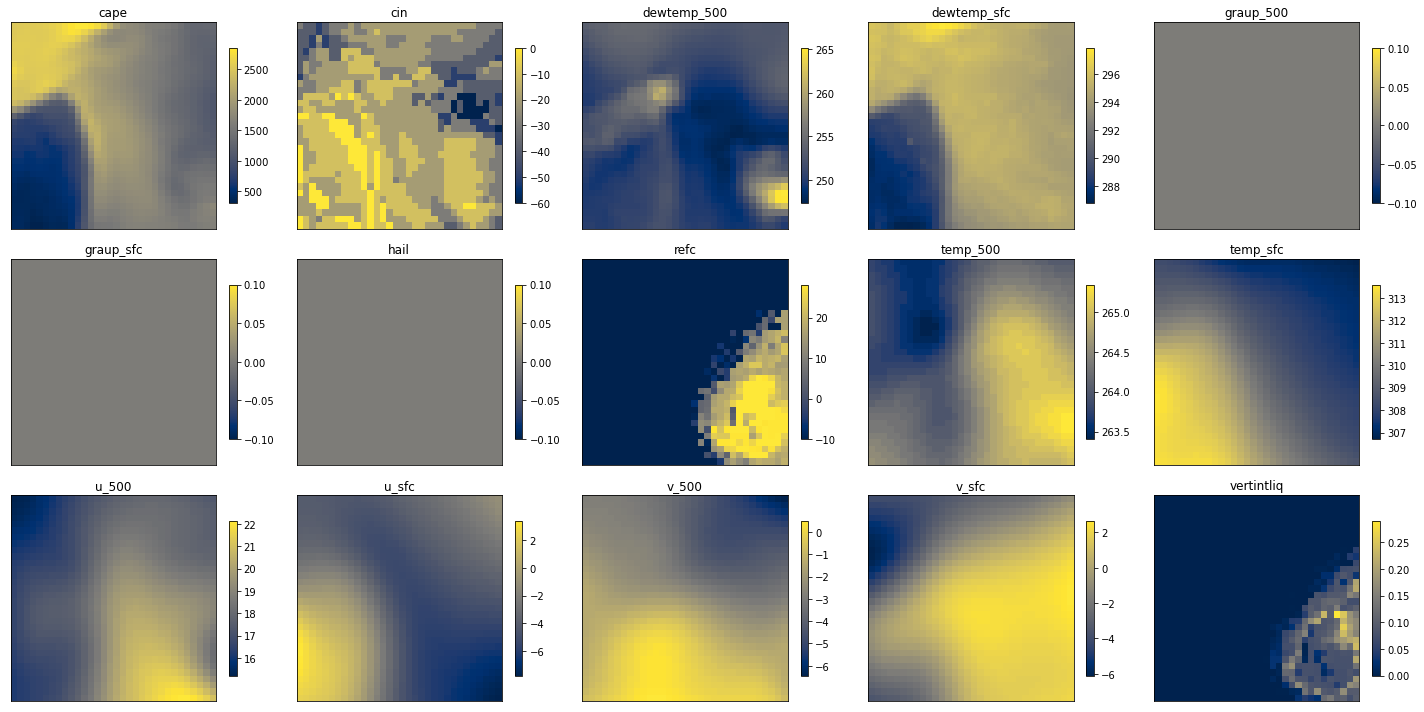

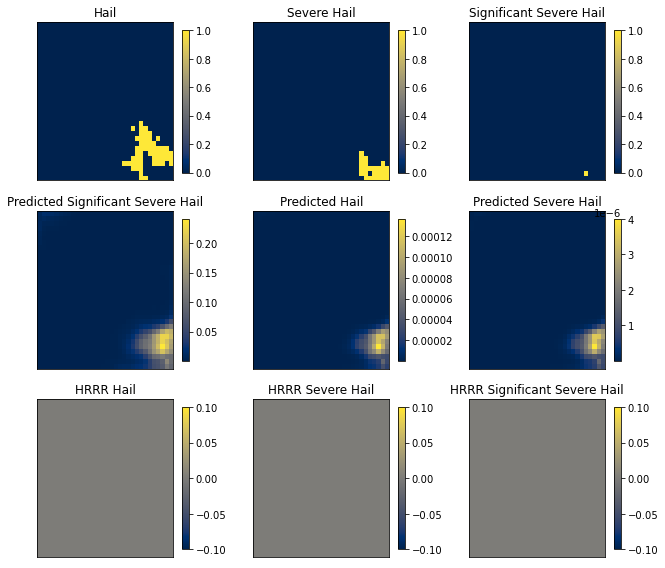

In [374]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20200720_0000.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[2])

In [375]:
#index2-3
idx = 3
time = times2[idx]
lat = lats2[idx]
lon = lons2[idx]
print(time)

2019-08-18T01:00


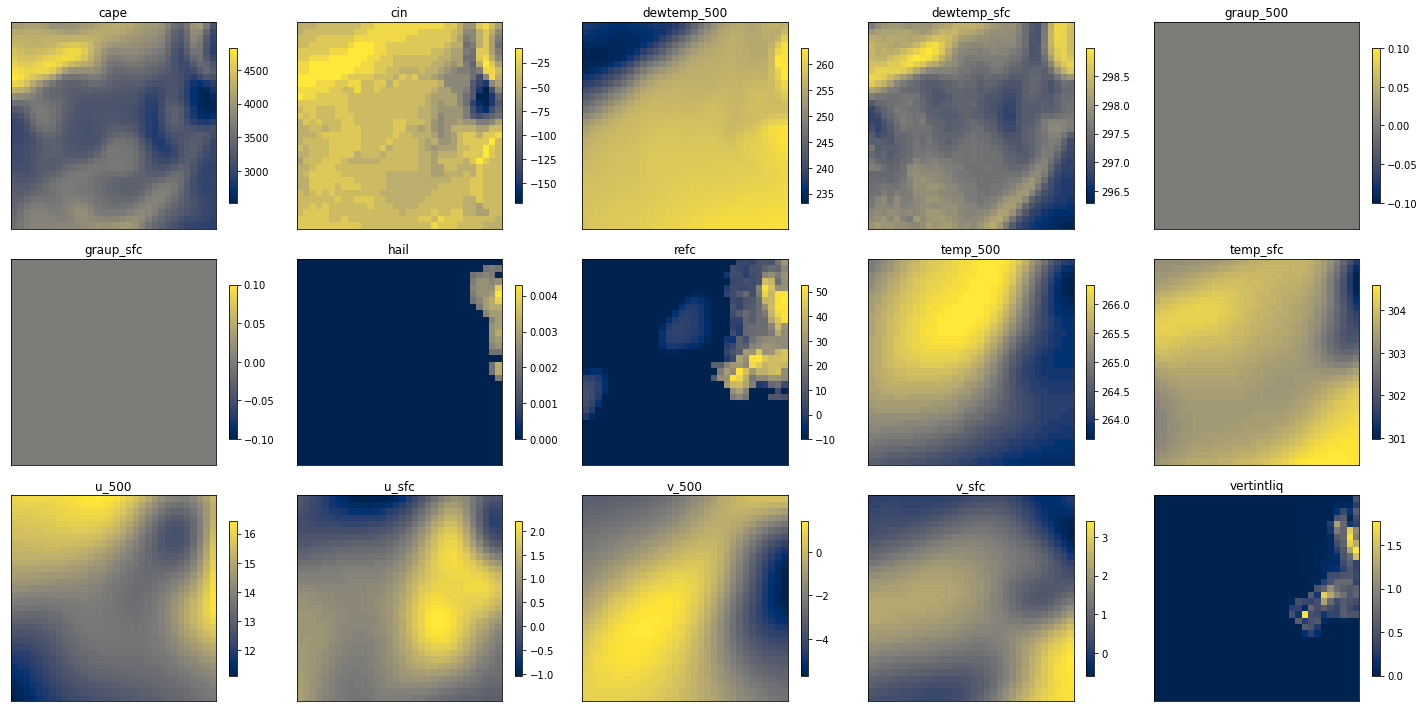

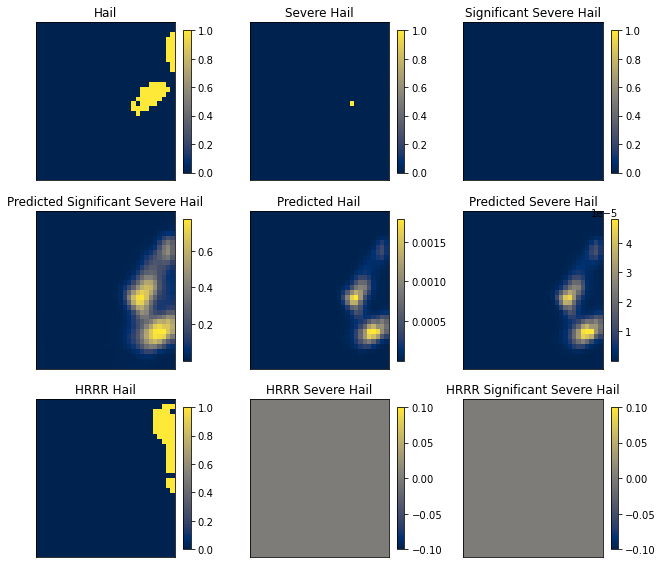

In [377]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190818_0100.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index2[3])

In [378]:
#index2-4
idx = 4
time = times2[idx]
lat = lats2[idx]
lon = lons2[idx]
print(time)

2019-08-18T01:00


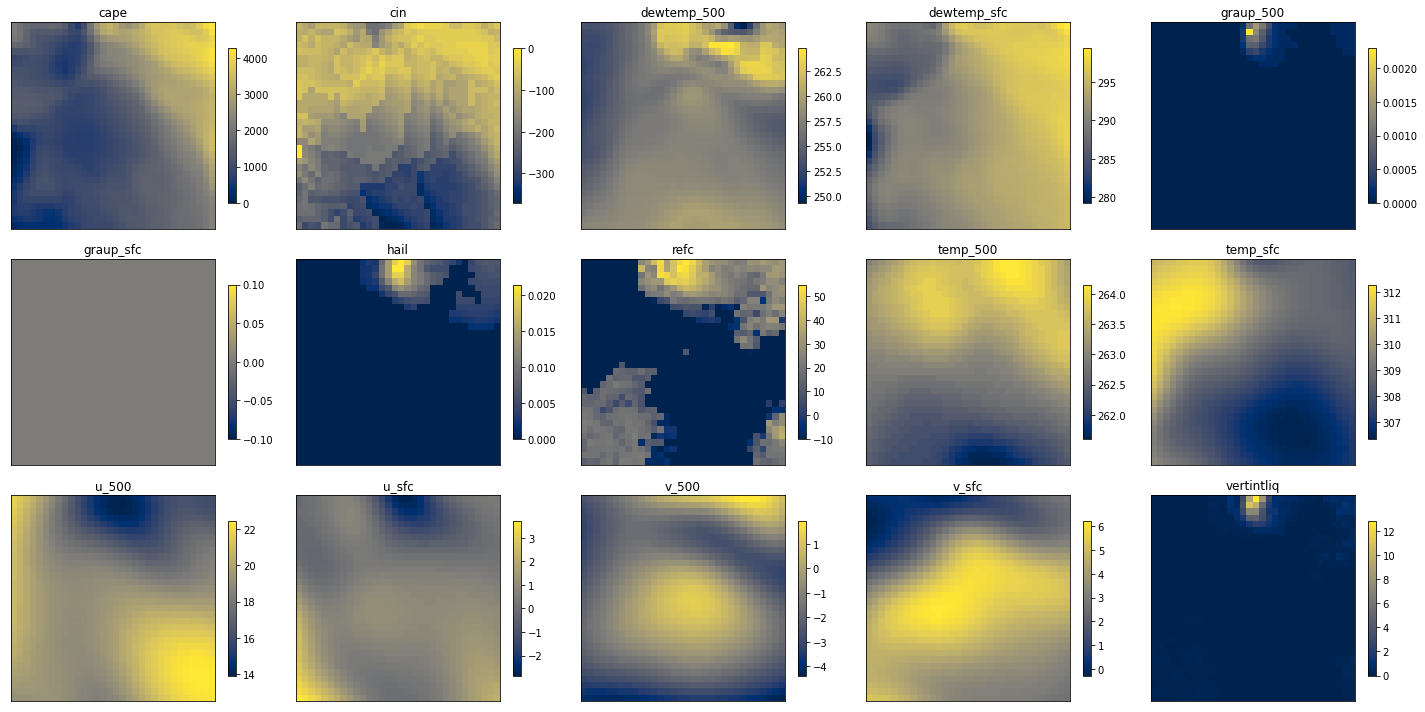

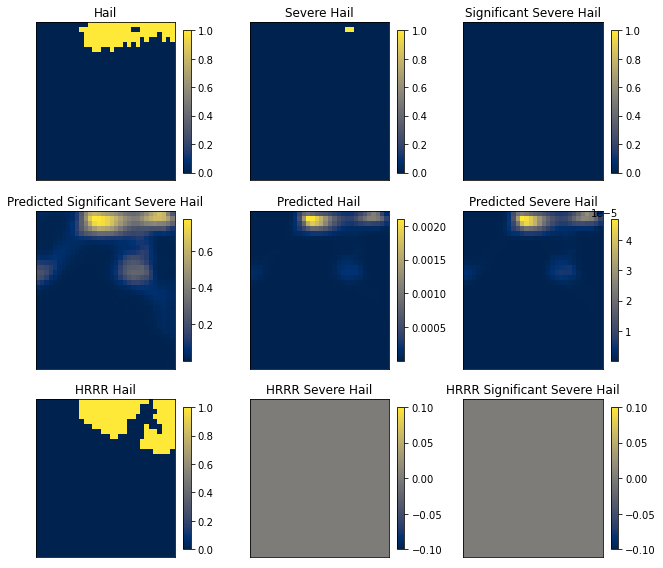

In [379]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190818_0100.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index2[4])

### Bad Patches

In [380]:
#index3-3
idx = 3
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-07-04T05:00


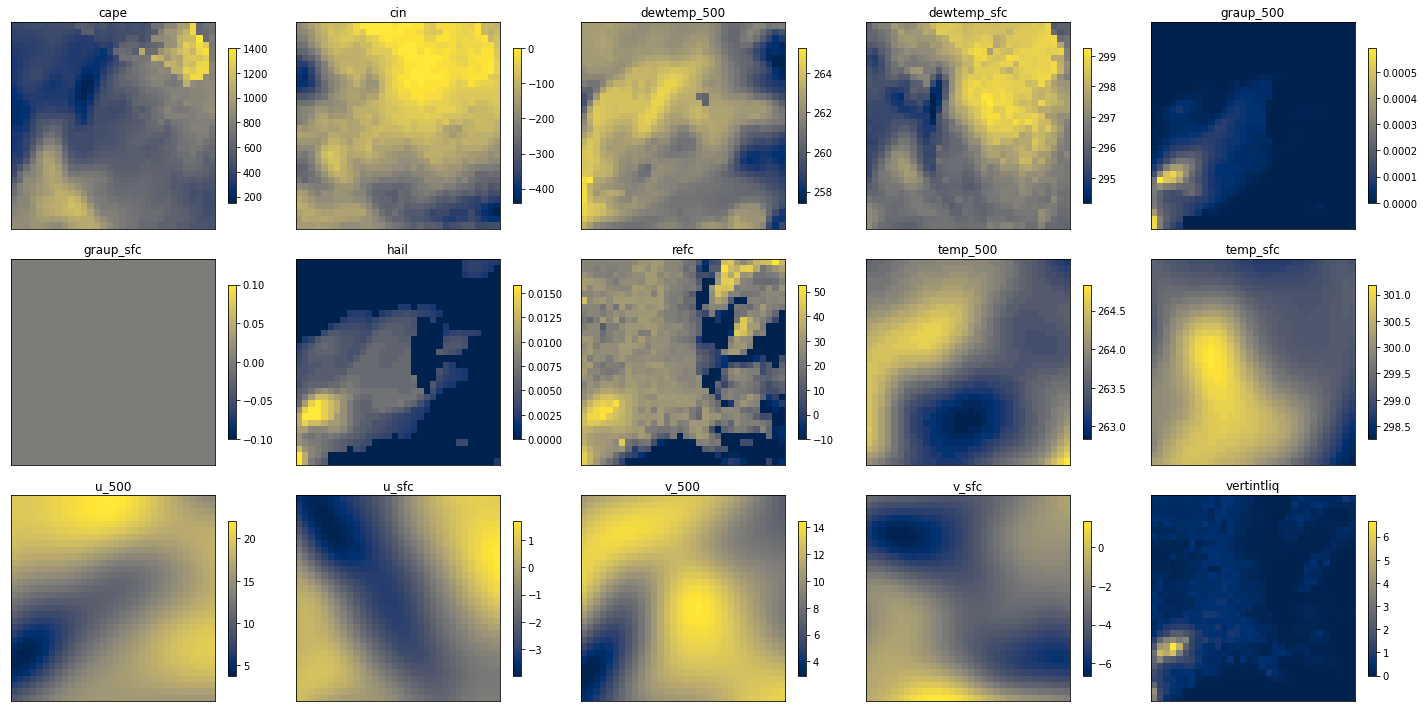

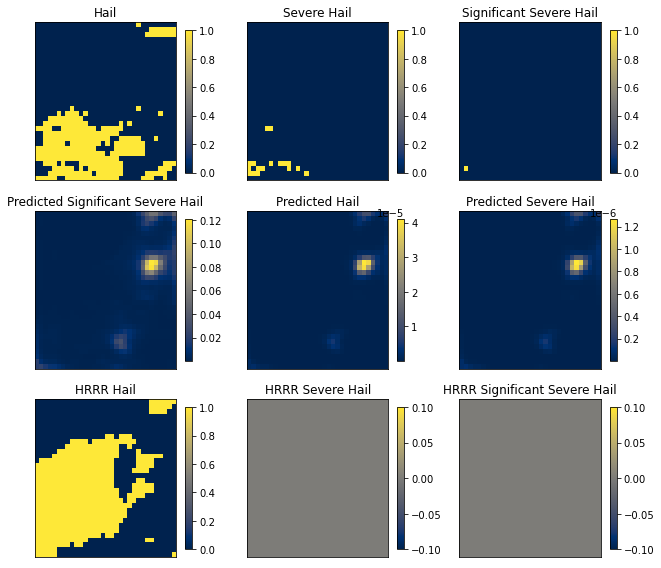

In [381]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190704_0500.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[3])

In [382]:
#index3-4
idx = 4
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-08-16T04:00


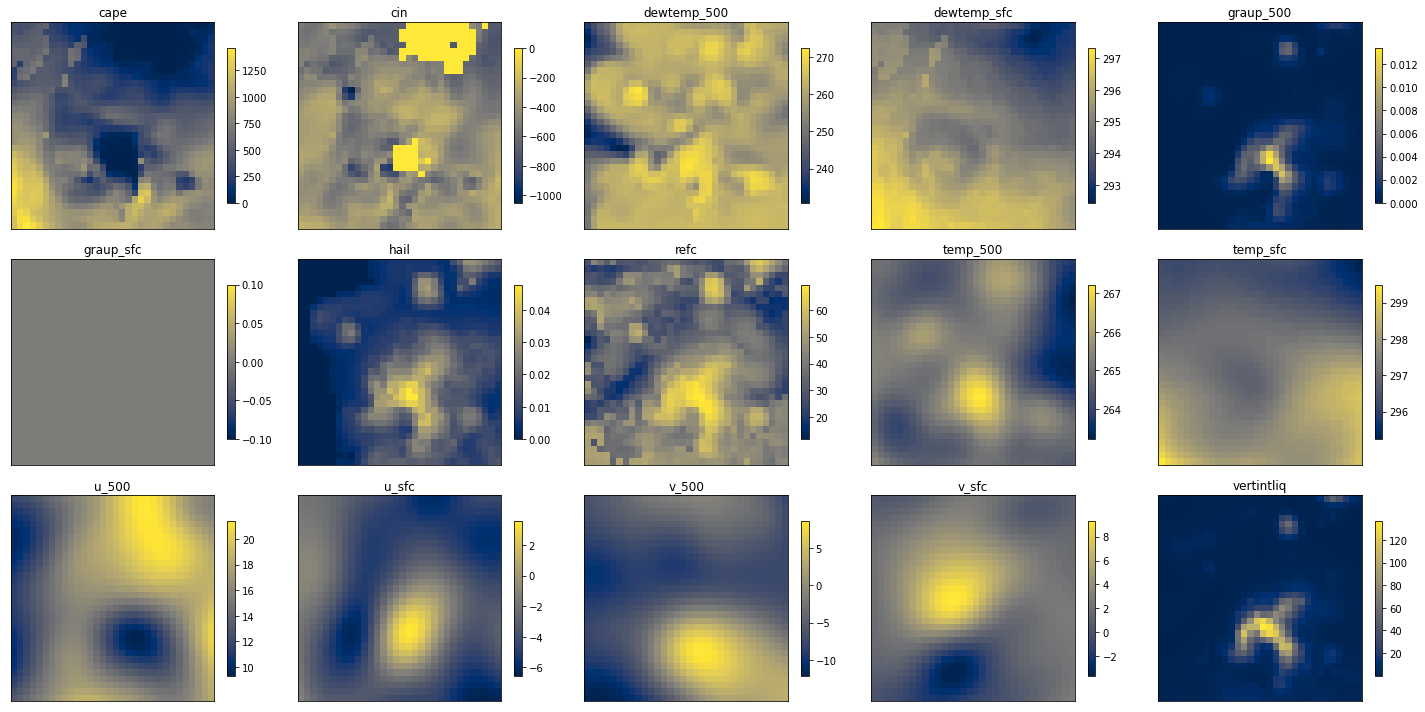

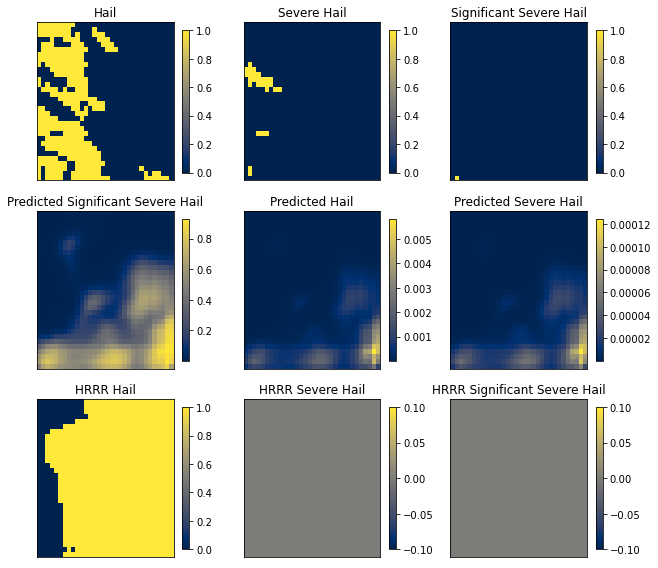

In [383]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190816_0400.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[4])

In [384]:
#index2-5
idx = 5
time = times2[idx]
lat = lats2[idx]
lon = lons2[idx]
print(time)

2019-07-12T05:00


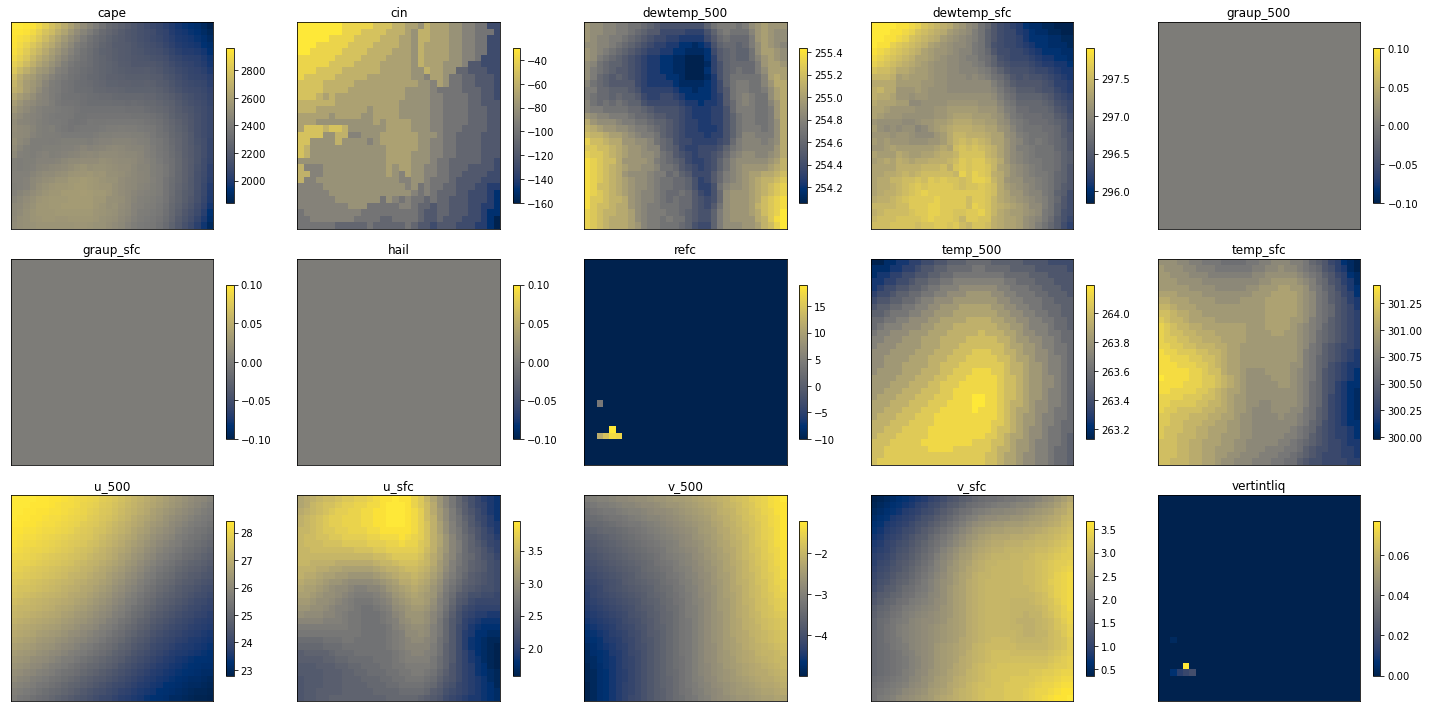

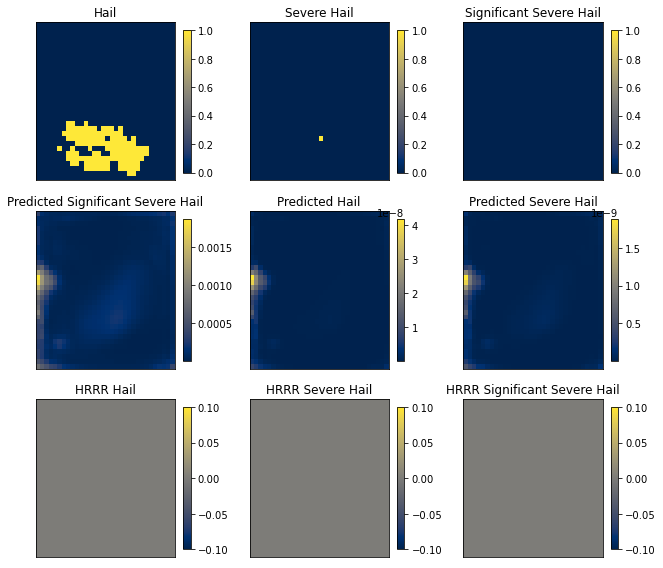

In [385]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190712_0500.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index2[5])

### Mixed Bag

In [386]:
#index3-0
idx = 0
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-07-09T02:00


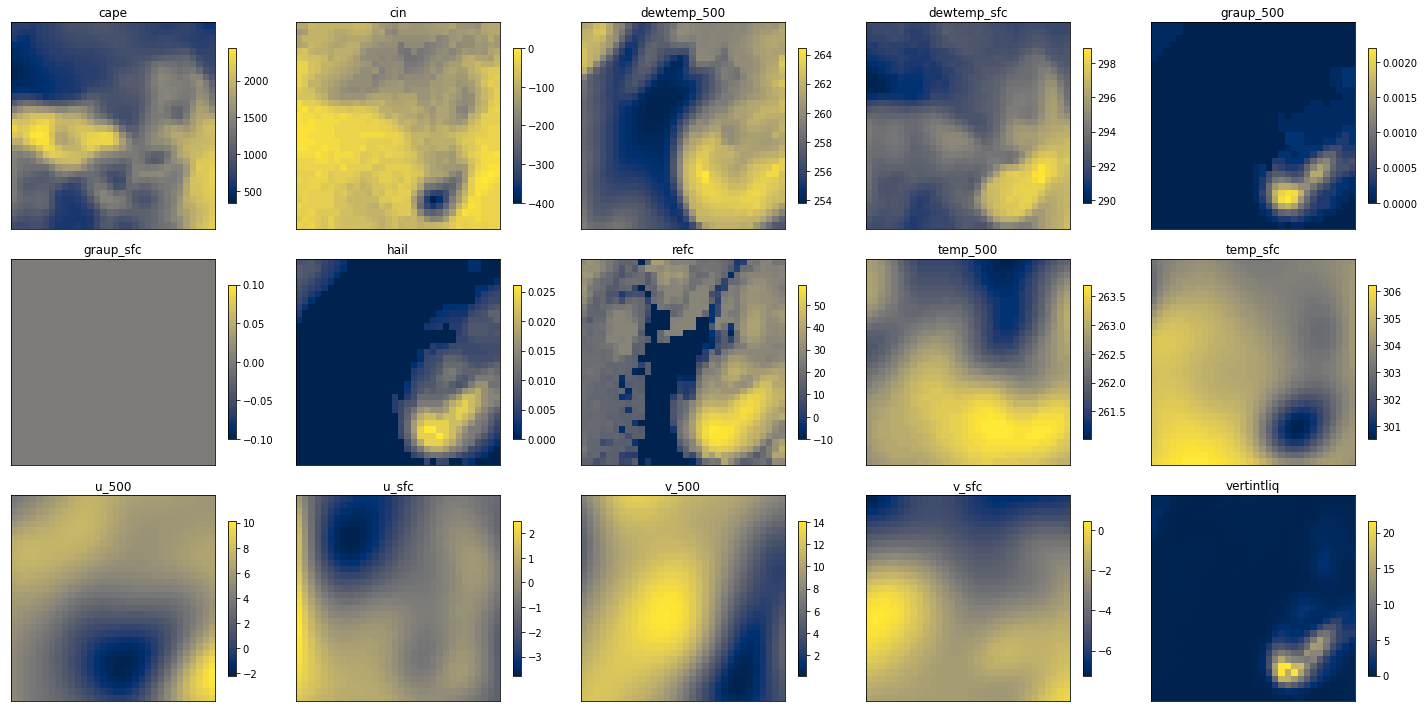

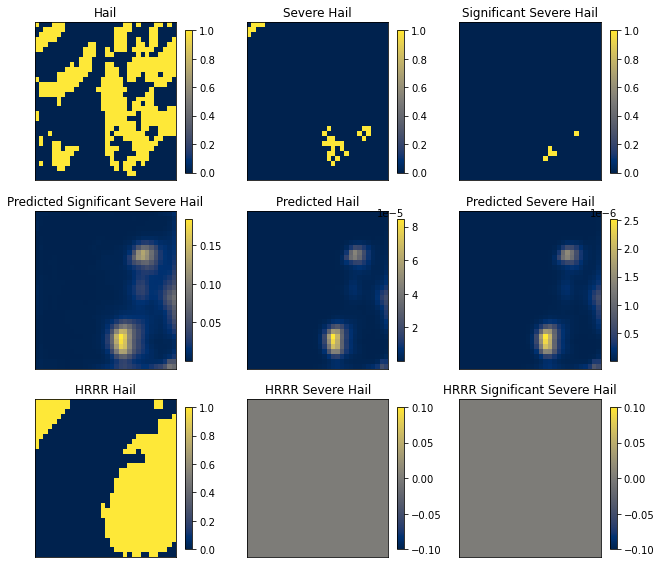

In [387]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190709_0200.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[0])

In [388]:
#index3-1
idx = 1
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-07-05T02:00


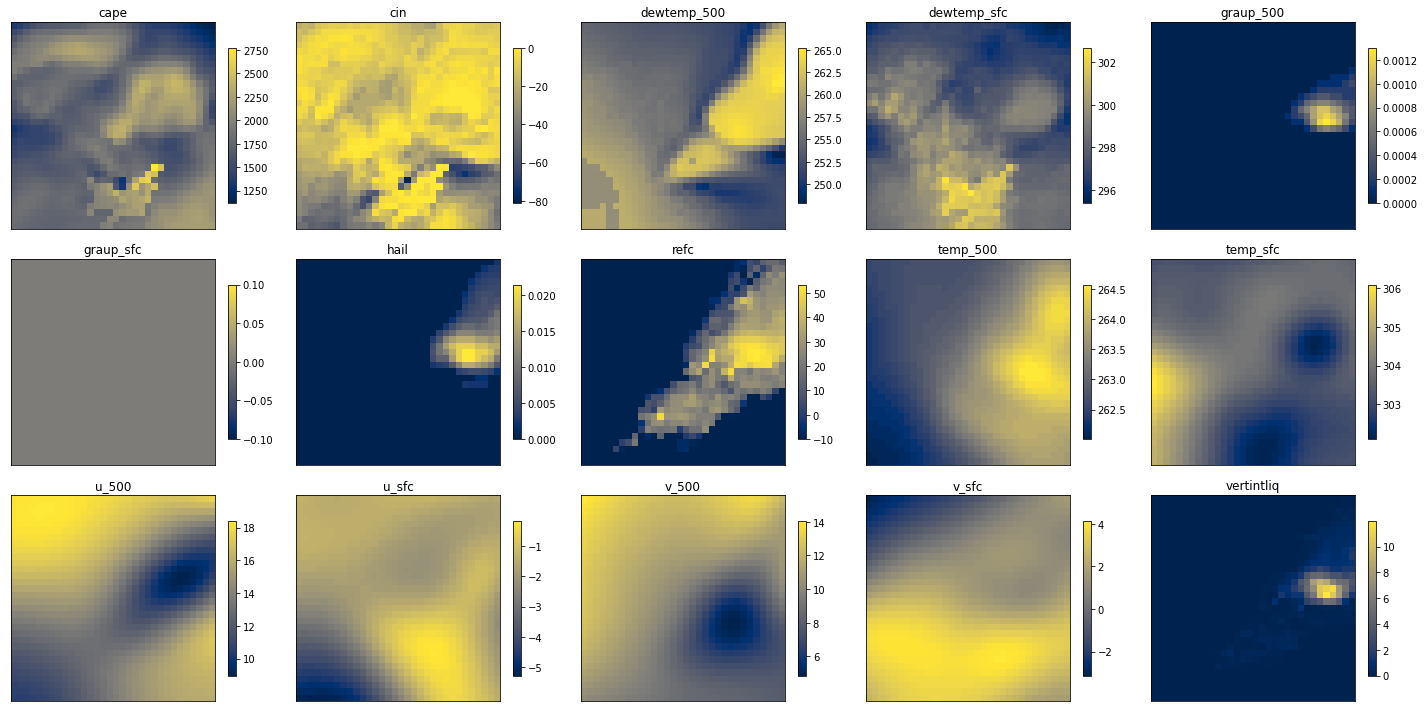

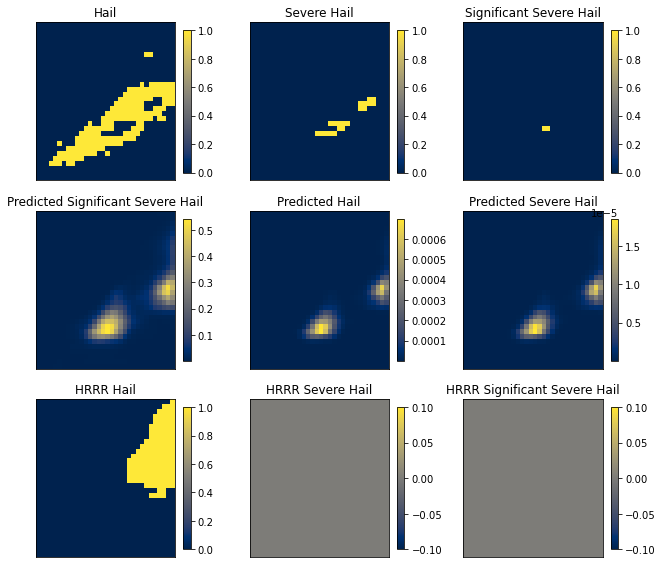

In [389]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190705_0200.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[1])

In [390]:
#index3-5
idx = 5
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-08-20T22:00


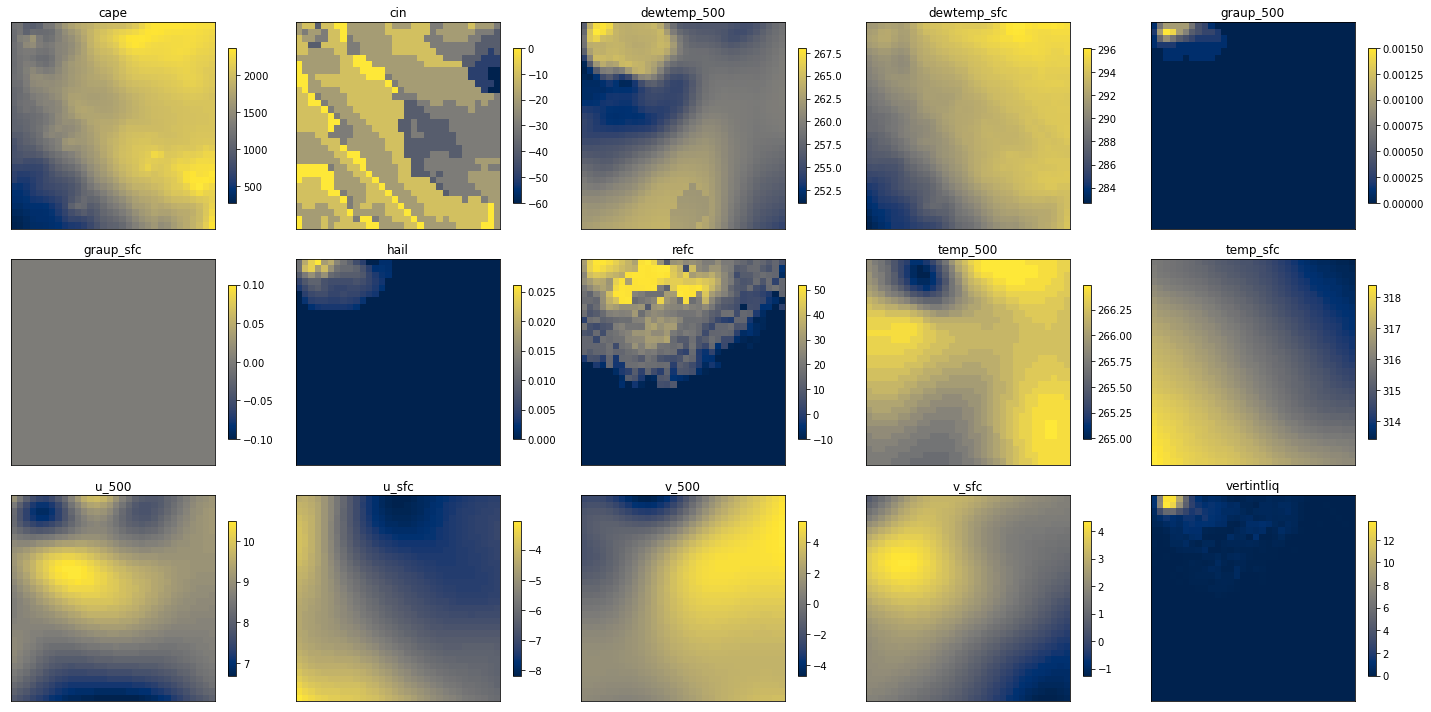

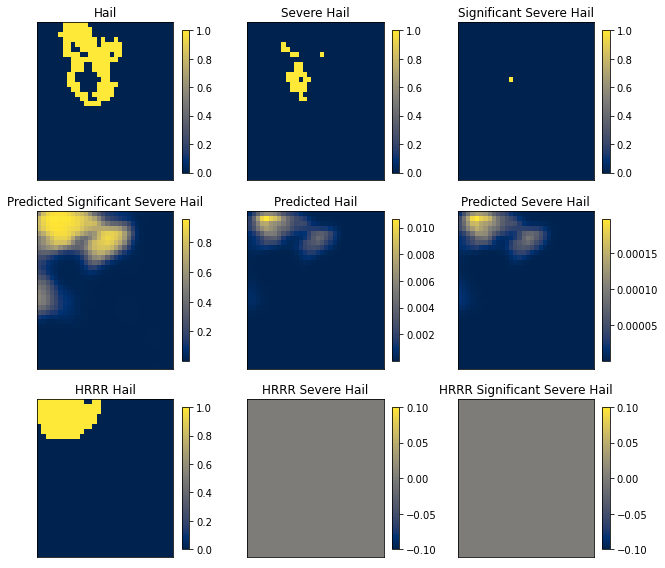

In [391]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190820_2200.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[5])

In [392]:
#index3-6
idx = 6
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-07-15T21:00


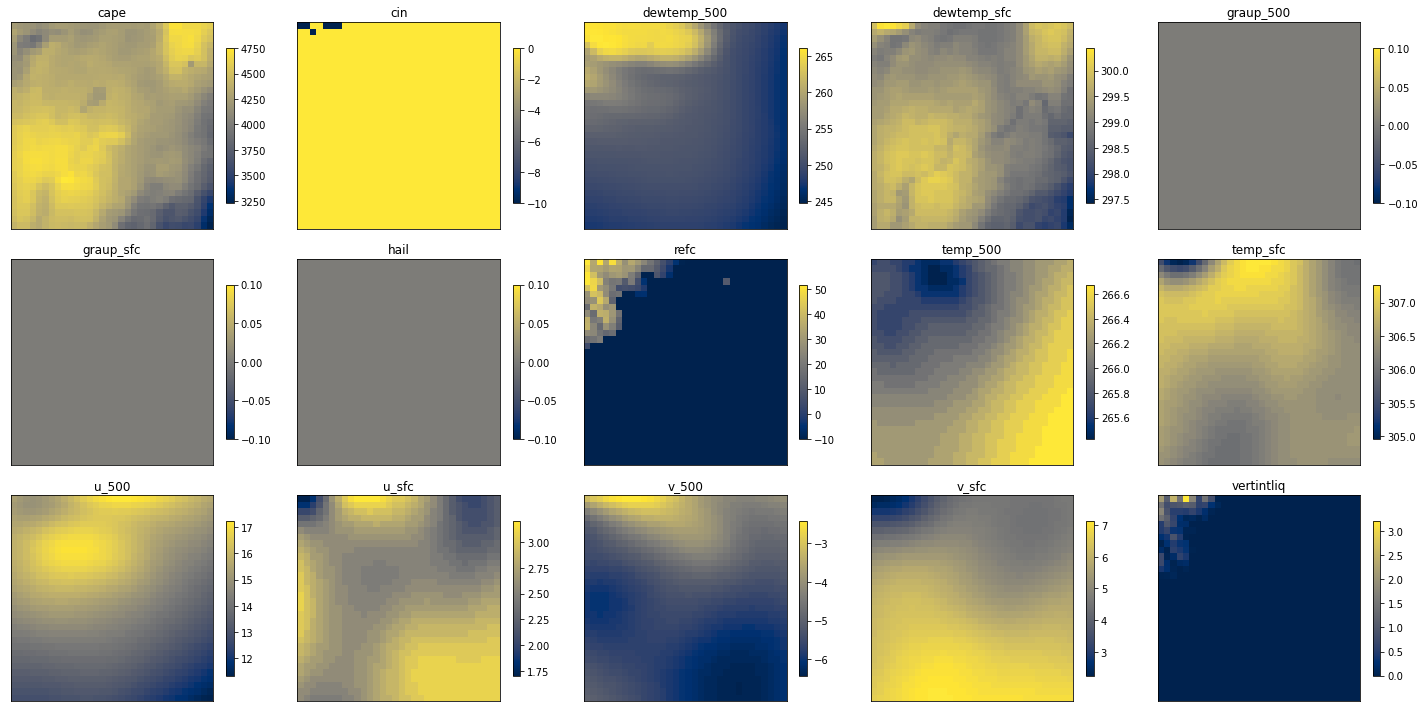

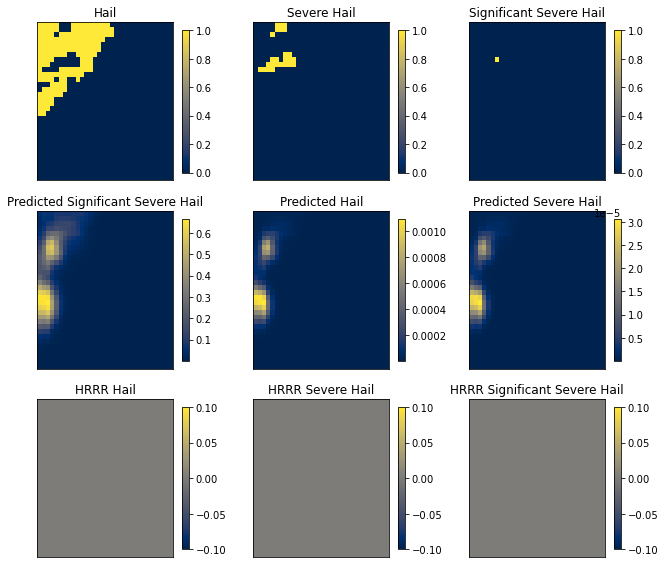

In [393]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190715_2100.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[6])

In [394]:
#index3-7
idx = 7
time = times3[idx]
lat = lats3[idx]
lon = lons3[idx]
print(time)

2019-08-16T04:00


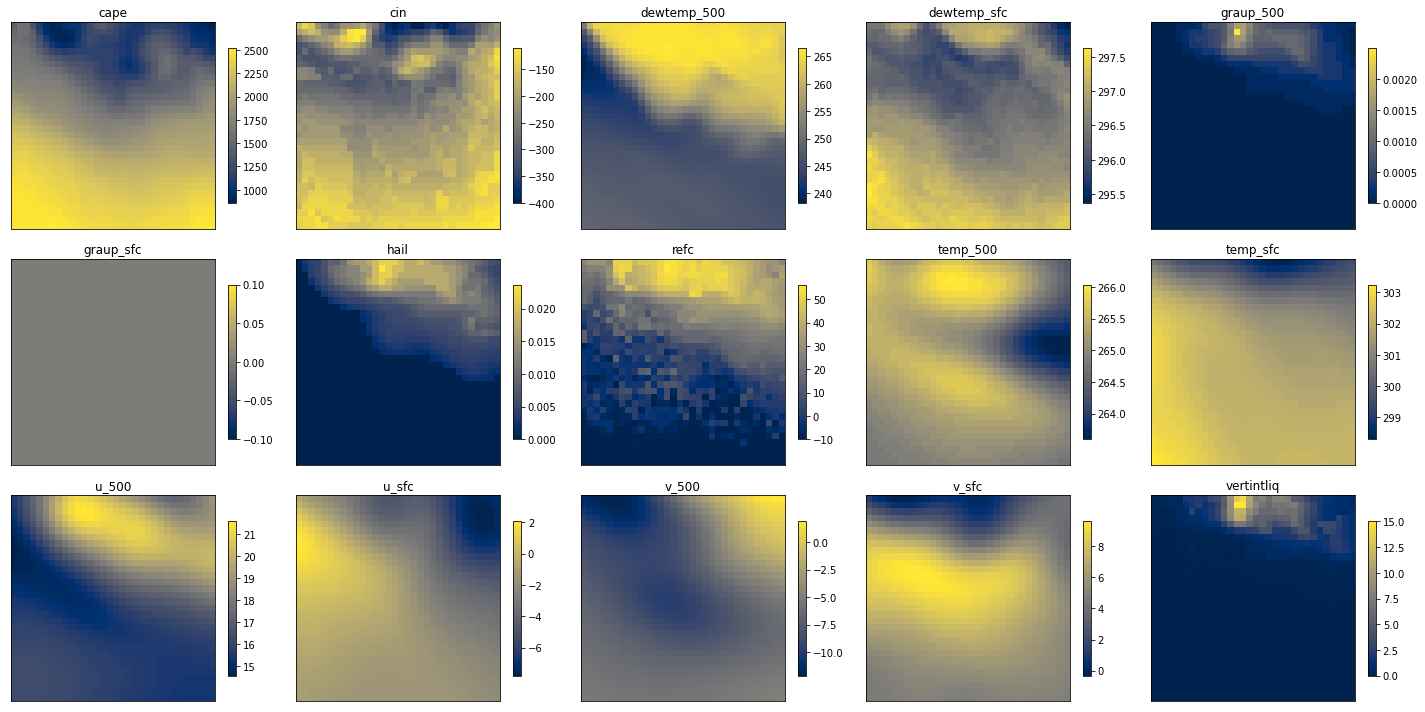

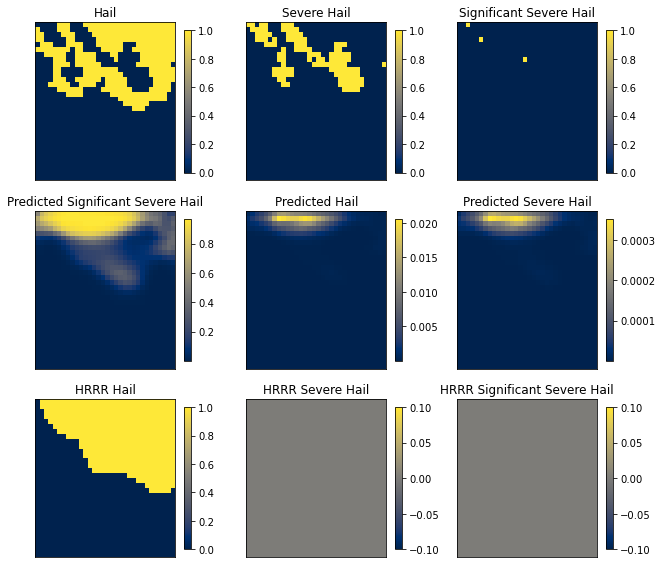

In [395]:
hrrr = xr.open_dataset("ml_model_data/testing_hrrr_data/20190816_0400.nc")
x1, y1 = np.unravel_index(abs(hrrr.latitude.values - lat).argmin(), hrrr.hail.values.shape)
patch = hrrr.isel(x=slice(x1,x1+32), y=slice(y1,y1+32))
plot_patch(patch)
plot_mesh(mesh1000, output2000, patch, idx=index3[7])